# Análisis de Redes en *Python*: Introducción
<br>
<img src="https://miro.medium.com/max/2978/1*rmq7bd3GFjcwfXtkrBQaPQ.png" alt="drawing" width="300"/>

## Software

NetworkX es un paquete Python para la creación, manipulación y estudio de la estructura, dinámica y funciones de redes complejas.

In [1]:
#Installation
#!conda install networkx

<img src="https://networkx.org/_static/networkx_logo.svg" alt="drawing" width="300"/>

In [2]:
import networkx as nx

NetworkX es un paquete muy completo que incluye entre otras cosas:

* Estructuras de datos para grafos
* Muchos algoritmos estándar
* Medidas de análisis
* Generadores de grafos clásicos, grafos aleatorios y redes sintéticas

NetworkX tiene distintas clases para distintos tipos
* Graph: No dirigido, simple
* DiGraph: Dirigido, simple
* MultiGraph: No dirigido, múltiples aristas paralelas
* MultiDiGraph: Dirigido, múltiples aristas

NetworkX es versátil por lo que: 

* Los nodos pueden ser "cualquier cosa" (por ejemplo, texto, imágenes, registros XML)
* Los aristas pueden contener datos arbitrarios (por ejemplo, pesos, series temporales)

## Primeros pasos

#### Construir un grafo


In [3]:
# Tan fácil como 

G = nx.Graph() 

# Añadir un nodo 
G.add_node("Katara")

# Añadir arista
G.add_nodes_from(["Katara", "Aang"])

# Pregunta
# ¿Qué pasa si añado una arista a un nodo que no existe? 

# Añadir aristas desde una lista de tuplas
edges = [("Zuko","Katara"),("Aang","Katara"),("Zoka","Zuko"),("Suki","Zoka"),("Katara","Suki")]

G.add_edges_from(edges)


### Reto

¿Cómo defino el grafo anterior como un grafo dirigido?

In [4]:
# Aquí va tu respeusta

#### Leer un grafo

#### NetworkX soporta distintos formatos y estructuras

Estas son algunas de las mas frecuentes

Archivos

* nx.read_graphml()
* nx.read_yaml()
* nx.read_gexf()
* nx.read_gpickle()

Estructuras
* nx.read_edgelist()
* nx.read_adjlist()
* nx.read_weighted_edgelist()


Es posible incluso usar Pandas como intermediario, a continuación un ejemplo de como leer un grafo desde la web.

In [5]:
import urllib.request
import pandas as pd
from io import StringIO  

In [6]:
txt = urllib.request.urlopen("https://raw.githubusercontent.com/HumanidadesDigitales/Materiales/main/datasets/euroroad.edges").read().decode("utf-8") 
csvfile = StringIO(txt) 
df = pd.read_csv(csvfile,sep=" ")
df.columns=["source","target"]

In [7]:
df

,source,target
0,2,3
1,2,17
2,3,4
3,4,5
4,4,855
...,...,...
1411,1167,1168
1412,1168,1169
1413,1169,1170
1414,1171,1172


In [8]:
G = nx.from_pandas_edgelist(df)

In [9]:
list(G.edges())[:10]

[(2, 3),
 (2, 17),
 (3, 4),
 (17, 16),
 (17, 18),
 (4, 5),
 (4, 855),
 (855, 390),
 (6, 7),
 (6, 880)]

In [10]:
list(G.nodes())[:10]

[2, 3, 17, 4, 5, 855, 6, 7, 880, 8]

#### Visualizar un grafo

In [11]:
karate = nx.karate_club_graph() # Tomamos un grafo precargado en NetworkX

*Zachary’s Karate Club* representa una red social de un club de karate universitario, 
descrito en el paper *An Information Flow Model for Conflict and Fission in Small Groups* de Wayne W. Zachary. Es uno de los grafos mas famosos de todos los tiempos.

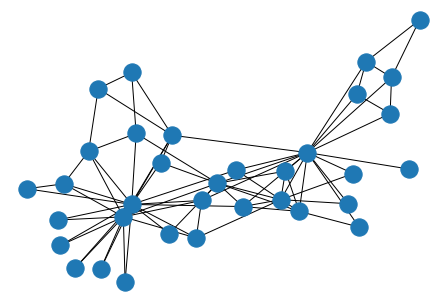

In [12]:
#Tan facil como

nx.draw(karate) 

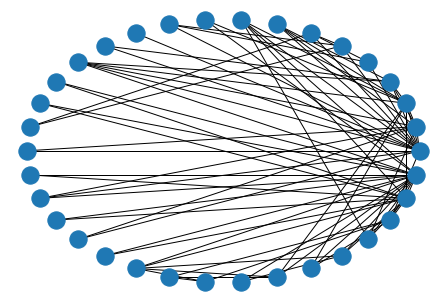

In [13]:
#Existen distintos algortimos para definir el *layout* (las posiciones de los nodos) de un grafo y dibujarlo.

nx.draw_circular(karate)


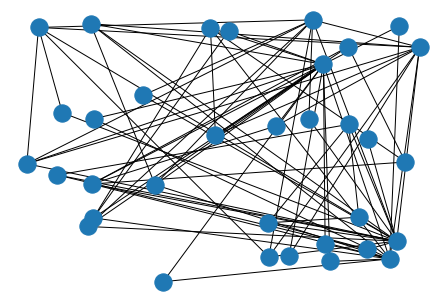

In [14]:
nx.draw_random(karate)

También es posible dibujar los nodos y aristas de manera independiente para tener mas control.

In [15]:
#Ejemplo
import matplotlib.pyplot as plt
pos = nx.spring_layout(G)

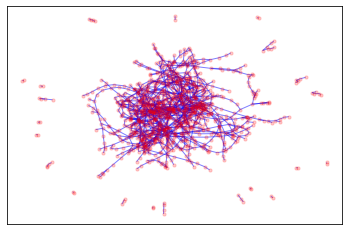

In [16]:
nx.draw_networkx_nodes(G,pos,node_size=10,node_color="red",alpha=0.2)
nx.draw_networkx_edges(G,pos,edge_color="blue",alpha=0.5)

plt.show()

### Analisis Simple

Numero de Nodos y Aristas

In [17]:
print("\nNum_Nodes: "+str(karate.number_of_nodes()),"\nNum_Edges: "+str(karate.number_of_edges()))


Num_Nodes: 34 
Num_Edges: 78


#### Eccentricity

La eccentricity de un node v es la máxima distancia de v a todos los demas nodos en G.

In [18]:
nx.eccentricity(karate)

{0: 3,
 1: 3,
 2: 3,
 3: 3,
 4: 4,
 5: 4,
 6: 4,
 7: 4,
 8: 3,
 9: 4,
 10: 4,
 11: 4,
 12: 4,
 13: 3,
 14: 5,
 15: 5,
 16: 5,
 17: 4,
 18: 5,
 19: 3,
 20: 5,
 21: 4,
 22: 5,
 23: 5,
 24: 4,
 25: 4,
 26: 5,
 27: 4,
 28: 4,
 29: 5,
 30: 4,
 31: 3,
 32: 4,
 33: 4}

#### Diámetro

El Diámetro es la *eccentricity* máxima

In [19]:
nx.diameter(karate)

5

#### Radio

El Radio is la *eccentricity* mínima.



In [20]:
nx.radius(karate)

3

#### Grado

El grado de nodo es el número de aristas adyacentes al nodo.

In [21]:
karate.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

## Reto

Busca alguna red que te guste y repite los pasos anteriores con ella.

* Lee tu red con I/O, Pandas o NetworkX
* Visualizala utlizando algún *layout* y escribe las ventajes o desventajas que tiene.
* Reporta:
    * El número de nodos y aristas
    * La Eccentricidad
    * El Diámetro
    * El Radio
    * El nodo con el mayor grado 


In [22]:
# Aquí va tu código